In [1]:
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt
from math import sqrt

#estimators
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

#model metrics
from sklearn.metrics import confusion_matrix, classification_report

#cross validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


In [2]:
from feature_engine.discretisers import EqualWidthDiscretiser

In [3]:
data = pd.read_csv("Credit_One_DataSet.csv")

In [4]:
data.head()

,LIMIT_BAL,DPNM,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,1,2,2,1,24,2,2,-1,-1,...,689,0,0,0,0,689,0,0,0,0
1,120000,1,2,2,2,26,-1,2,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,0,2,2,2,34,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,0,2,2,1,37,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,0,1,2,1,57,-1,0,-1,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [5]:
#data = data[data['DPNM']==1]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   DPNM       30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_0      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

In [6]:
SEED=123

In [7]:
data = data.drop(['SEX','MARRIAGE'], axis=1)
data = data.sample(30000, random_state=SEED) #Obtengo el mismo resultado con 30000

In [8]:
data.head()

,LIMIT_BAL,DPNM,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
25665,40000,0,2,26,-1,0,0,0,-1,0,...,13600,0,44024,18697,1300,1000,0,22373,680,10000
16464,80000,0,3,59,0,0,0,0,0,0,...,53169,50875,50372,49470,3212,2106,2000,1603,1903,2006
22386,170000,1,1,30,2,2,2,2,2,2,...,161487,157577,168094,170922,6800,6500,0,13000,5500,1000
10149,200000,1,2,41,-2,-2,-2,-2,-2,-2,...,0,0,0,0,742,0,0,0,0,0
8729,50000,0,2,43,0,0,0,0,0,0,...,9044,9225,9417,9617,1140,1150,331,341,356,330


In [9]:
data['BILL_AMT_total']=data['BILL_AMT1']+data['BILL_AMT2']+data['BILL_AMT3']+data['BILL_AMT4']+data['BILL_AMT5']+data['BILL_AMT6']
data['PAY_AMT_total']=data['PAY_AMT1']+data['PAY_AMT2']+data['PAY_AMT3']+data['PAY_AMT4']+data['PAY_AMT5']+data['PAY_AMT6']
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 25665 to 19966
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   LIMIT_BAL       30000 non-null  int64
 1   DPNM            30000 non-null  int64
 2   EDUCATION       30000 non-null  int64
 3   AGE             30000 non-null  int64
 4   PAY_0           30000 non-null  int64
 5   PAY_2           30000 non-null  int64
 6   PAY_3           30000 non-null  int64
 7   PAY_4           30000 non-null  int64
 8   PAY_5           30000 non-null  int64
 9   PAY_6           30000 non-null  int64
 10  BILL_AMT1       30000 non-null  int64
 11  BILL_AMT2       30000 non-null  int64
 12  BILL_AMT3       30000 non-null  int64
 13  BILL_AMT4       30000 non-null  int64
 14  BILL_AMT5       30000 non-null  int64
 15  BILL_AMT6       30000 non-null  int64
 16  PAY_AMT1        30000 non-null  int64
 17  PAY_AMT2        30000 non-null  int64
 18  PAY_AMT3        30000 

In [10]:
#X = data.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]]
X = data.iloc[:,[0,4,5,6,7,8,9,22,23]]

In [11]:
print("Features sample")
X.head()

Features sample


,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT_total,PAY_AMT_total
25665,40000,-1,0,0,0,-1,0,129703,35353
16464,80000,0,0,0,0,0,0,349621,12830
22386,170000,2,2,2,2,2,2,972809,32800
10149,200000,-2,-2,-2,-2,-2,-2,24305,742
8729,50000,0,0,0,0,0,0,53551,3648


In [12]:
#data_d = EqualWidthDiscretiser(bins=10, variables = ['AGE',
#                                                   'LIMIT_BAL'])  ###Produces the same results
#data_d.fit(data)
#data_t = data_d.transform(data)
#data_t.head()
#data = data_t

In [13]:
#X.head()

In [14]:
X = data.iloc[:,[0,4,5,6,7,8,9,22,23]]
X.head()

,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT_total,PAY_AMT_total
25665,40000,-1,0,0,0,-1,0,129703,35353
16464,80000,0,0,0,0,0,0,349621,12830
22386,170000,2,2,2,2,2,2,972809,32800
10149,200000,-2,-2,-2,-2,-2,-2,24305,742
8729,50000,0,0,0,0,0,0,53551,3648


In [15]:
y = data['DPNM']
print(y)

25665    0
16464    0
22386    1
10149    1
8729     0
        ..
28636    0
17730    0
28030    1
15725    0
19966    0
Name: DPNM, Length: 30000, dtype: int64


In [16]:
rf = RandomForestClassifier(n_estimators=10,max_depth=3, random_state=SEED)
dtree = DecisionTreeClassifier(max_depth=3)
gradientb = GradientBoostingClassifier(n_estimators=10,random_state=SEED)

In [17]:
# list of algorithms
# Set n_jobs to -1 in order to exploit all CPU cores in computation
algos_Class = []
algos_Class.append(('Random Forest Classifier', rf))
algos_Class.append(('Decision Tree Classifier', dtree))
algos_Class.append(('GradientBoostingClassifier', gradientb))

In [18]:
#Building and assesing models
scores = []
names = []
for name, model in algos_Class:
    score = cross_val_score(model, X,y, cv=5, scoring='accuracy')
    names.append(name)
    scores.append(score)

In [19]:
#Output
for i in range(len(names)):
    print(names[i],scores[i].mean())

Random Forest Classifier 0.8210000000000001
Decision Tree Classifier 0.8208
GradientBoostingClassifier 0.8196666666666665


In [20]:
# Split data into 80% train and 20% test. We will try also 70% and 30 %
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

In [21]:
rf.fit(X_train, y_train)
y_predict_rf = rf.predict(X_test)

In [22]:
dtree.fit(X_train, y_train)
y_predict_dtree = dtree.predict(X_test)

In [23]:
gradientb.fit(X_train, y_train)
y_predict_gradientb = gradientb.predict(X_test)

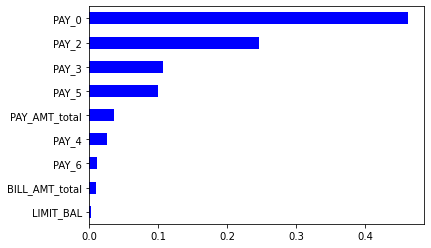

In [24]:
# See Feature importance
importances_rf = pd.Series(rf.feature_importances_, index = X.columns)
#Sort importances
sorted_importances_rf = importances_rf.sort_values()
#Show
sorted_importances_rf.plot(kind='barh', color='blue')
plt.show()

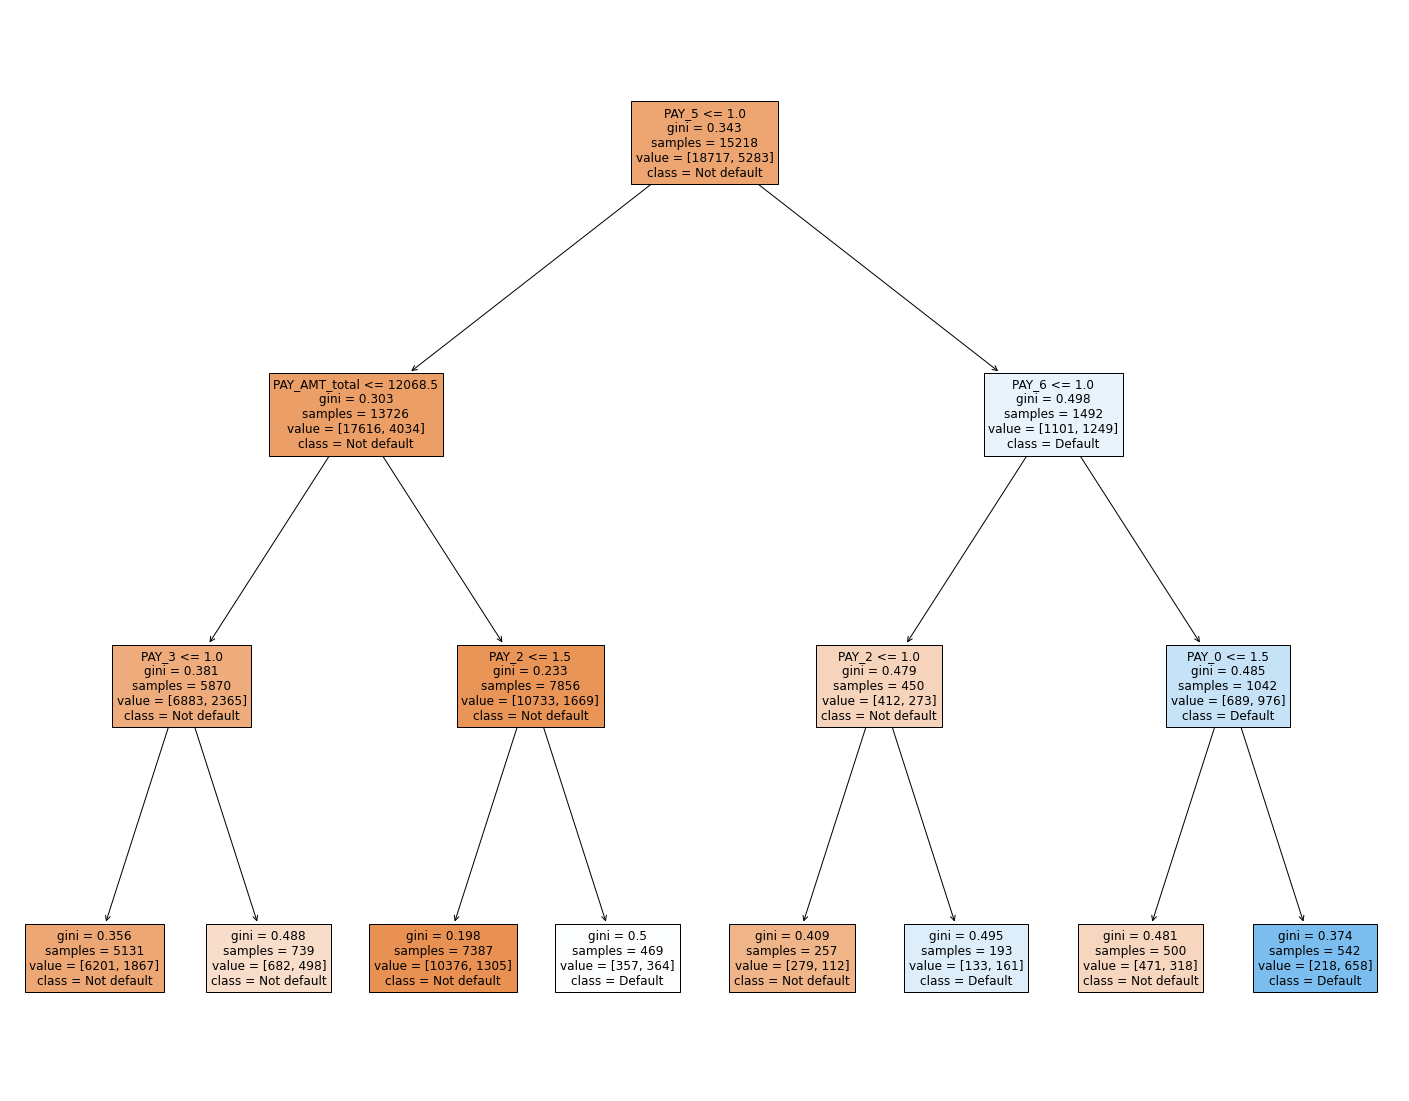

In [25]:
# Extract single tree
estimator = rf.estimators_[1]
from sklearn import tree
fig = plt.figure(figsize=(25,20))
tree = tree.plot_tree(estimator, feature_names=X.columns,class_names=['Not default', 'Default'], filled=True)

In [26]:
rf.n_classes_

2

In [27]:
rf.classes_

array([0, 1])

In [28]:
print(classification_report(y_test, y_predict_rf))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4665
           1       0.67      0.35      0.46      1335

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.68      6000
weighted avg       0.80      0.82      0.79      6000



In [29]:
confusion_matrix(y_test, y_predict_rf)

array([[4437,  228],
       [ 866,  469]])

In [30]:
print(classification_report(y_test, y_predict_dtree))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4665
           1       0.67      0.37      0.48      1335

    accuracy                           0.82      6000
   macro avg       0.76      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000



In [31]:
confusion_matrix(y_test, y_predict_dtree)

array([[4428,  237],
       [ 843,  492]])

In [32]:
print(classification_report(y_test, y_predict_gradientb))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      4665
           1       0.70      0.32      0.44      1335

    accuracy                           0.82      6000
   macro avg       0.77      0.64      0.66      6000
weighted avg       0.80      0.82      0.79      6000



In [33]:
confusion_matrix(y_test, y_predict_gradientb)

array([[4484,  181],
       [ 912,  423]])

Text(0.5, 0, 'Limit Balance ($)')

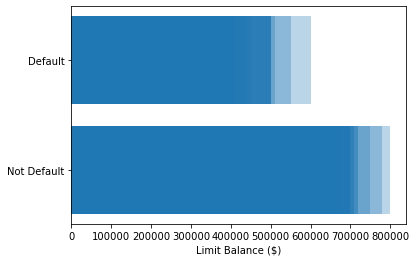

In [52]:
fig, ax = plt.subplots()
people = ('Not Default', 'Default')
y_pos = np.arange(len(people))
ax.barh(y_predict_gradientb, X_test['LIMIT_BAL'], alpha=0.3)
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
#plt.xlim(0, 1200000)
#plt.xscale('log')
plt.xlabel('Limit Balance ($)')

Text(0.5, 0, 'PAY_0')

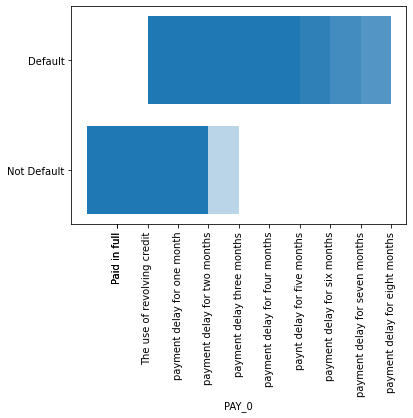

In [44]:
fig, ax = plt.subplots()
people = ('Not Default', 'Default')
y_pos = np.arange(len(people))
x_tag = ('No consumption','Paid in full','The use of revolving credit','payment delay for one month',
         'payment delay for two months','payment delay three months','payment delay for four months',
         'paynt delay for five months',
        'payment delay for six months','payment delay for seven months','payment delay for eight months')
x_pos = (-1,-1,0,1,2,3,4,5,6,7,8)
ax.barh(y_predict_gradientb, X_test['PAY_0'], alpha=0.3)
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.set_xticks(x_pos)
ax.set_xticklabels(x_tag, rotation=90)
plt.xlabel('PAY_0')

Text(0.5, 0, 'PAY_2')

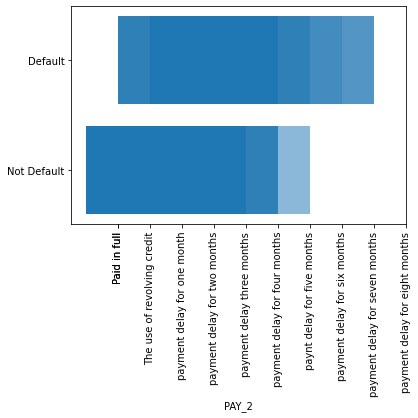

In [45]:
fig, ax = plt.subplots()
people = ('Not Default', 'Default')
y_pos = np.arange(len(people))
x_tag = ('No consumption','Paid in full','The use of revolving credit','payment delay for one month',
         'payment delay for two months','payment delay three months','payment delay for four months',
         'paynt delay for five months',
        'payment delay for six months','payment delay for seven months','payment delay for eight months')
x_pos = (-1,-1,0,1,2,3,4,5,6,7,8)
ax.barh(y_predict_gradientb, X_test['PAY_2'], alpha=0.3)
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.set_xticks(x_pos)
ax.set_xticklabels(x_tag, rotation=90)
plt.xlabel('PAY_2')

Text(0.5, 0, 'PAY_3')

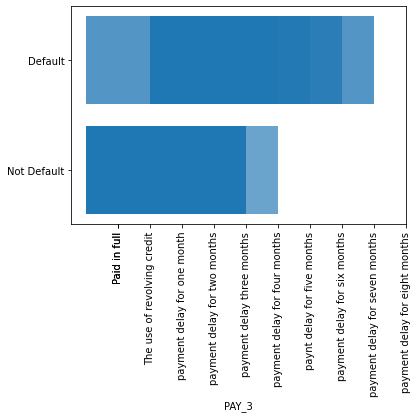

In [46]:
fig, ax = plt.subplots()
people = ('Not Default', 'Default')
y_pos = np.arange(len(people))
x_tag = ('No consumption','Paid in full','The use of revolving credit','payment delay for one month',
         'payment delay for two months','payment delay three months','payment delay for four months',
         'paynt delay for five months',
        'payment delay for six months','payment delay for seven months','payment delay for eight months')
x_pos = (-1,-1,0,1,2,3,4,5,6,7,8)
ax.barh(y_predict_gradientb, X_test['PAY_3'], alpha=0.3)
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.set_xticks(x_pos)
ax.set_xticklabels(x_tag, rotation=90)
plt.xlabel('PAY_3')

Text(0.5, 0, 'PAY_4')

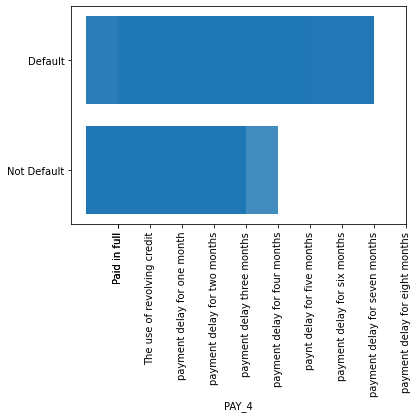

In [47]:
fig, ax = plt.subplots()
people = ('Not Default', 'Default')
y_pos = np.arange(len(people))
x_tag = ('No consumption','Paid in full','The use of revolving credit','payment delay for one month',
         'payment delay for two months','payment delay three months','payment delay for four months',
         'paynt delay for five months',
        'payment delay for six months','payment delay for seven months','payment delay for eight months')
x_pos = (-1,-1,0,1,2,3,4,5,6,7,8)
ax.barh(y_predict_gradientb, X_test['PAY_4'], alpha=0.3)
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.set_xticks(x_pos)
ax.set_xticklabels(x_tag, rotation=90)
plt.xlabel('PAY_4')

Text(0.5, 0, 'PAY_5')

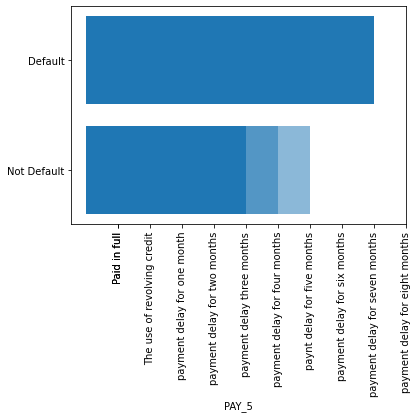

In [48]:
fig, ax = plt.subplots()
people = ('Not Default', 'Default')
y_pos = np.arange(len(people))
x_tag = ('No consumption','Paid in full','The use of revolving credit','payment delay for one month',
         'payment delay for two months','payment delay three months','payment delay for four months',
         'paynt delay for five months',
        'payment delay for six months','payment delay for seven months','payment delay for eight months')
x_pos = (-1,-1,0,1,2,3,4,5,6,7,8)
ax.barh(y_predict_gradientb, X_test['PAY_5'], alpha=0.3)
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.set_xticks(x_pos)
ax.set_xticklabels(x_tag, rotation=90)
plt.xlabel('PAY_5')

Text(0.5, 0, 'PAY_6')

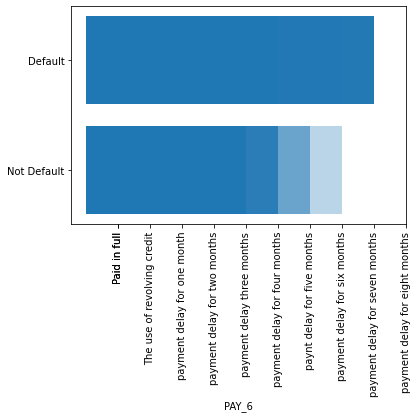

In [49]:
fig, ax = plt.subplots()
people = ('Not Default', 'Default')
y_pos = np.arange(len(people))
x_tag = ('No consumption','Paid in full','The use of revolving credit','payment delay for one month',
         'payment delay for two months','payment delay three months','payment delay for four months',
         'paynt delay for five months',
        'payment delay for six months','payment delay for seven months','payment delay for eight months')
x_pos = (-1,-1,0,1,2,3,4,5,6,7,8)
ax.barh(y_predict_gradientb, X_test['PAY_6'], alpha=0.3)
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.set_xticks(x_pos)
ax.set_xticklabels(x_tag, rotation=90)
plt.xlabel('PAY_6')

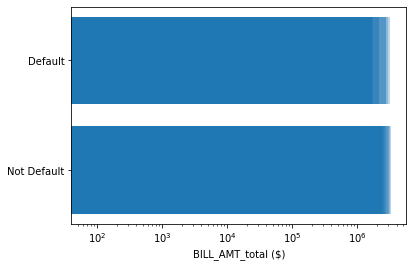

In [50]:
fig, ax = plt.subplots()
people = ('Not Default', 'Default')
y_pos = np.arange(len(people))
ax.barh(y_predict_gradientb, X_test['BILL_AMT_total'], alpha=0.3)
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
plt.xlabel('BILL_AMT_total ($)')
plt.xscale('log')

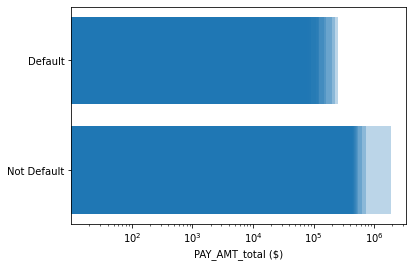

In [51]:
fig, ax = plt.subplots()
people = ('Not Default', 'Default')
y_pos = np.arange(len(people))
ax.barh(y_predict_gradientb, X_test['PAY_AMT_total'], alpha=0.3)
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
plt.xlabel('PAY_AMT_total ($)')
plt.xscale('log')